# Validating Selfplay Data

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from aegomoku.gomoku_board import GomokuBoard
from aegomoku.game_data import read_training_data
from aegomoku.utils import analyse_example, analyse_board

import os

from setup_prod import DATA_PATH
BOARD_SIZE=19

# The Data

In [6]:
PHASE = '0.1'
HOST = os.uname()[1]
SELFPLAY_DATA=DATA_PATH / 'selfplay' / PHASE / HOST
print(os.listdir(SELFPLAY_DATA))

['00003.pickle', '00009.pickle', '00006.pickle', '00002.pickle', '00001.pickle', '00007.pickle', '00011.pickle', '00012.pickle', '00004.pickle', '00005.pickle', '00010.pickle', '00008.pickle']


In [7]:
a_pickle = SELFPLAY_DATA / '00011.pickle'
filename = a_pickle.resolve().as_posix()
filename

'/home/wgiersche/workspace/Project-Ellie/DATA/selfplay/0.1/tensorbook/00011.pickle'

In [8]:
examples, games = read_training_data(filename)
len(games), len(examples), len(examples[0]), examples[0][0].shape

(40, 9952, 3, (21, 21, 3))

#### Game Info
Player name from `gameplay_params.yaml` and all moves

In [9]:
from aegomoku.policies.heuristic_value_model import HeuristicValueModel
from aegomoku.policies.heuristic_advice import HeuristicPolicyParams, HeuristicAdviser, HeuristicValueParams

value_params = HeuristicValueParams(board_size=BOARD_SIZE)
value_model = HeuristicValueModel(value_params)
adviser = HeuristicAdviser(HeuristicPolicyParams(board_size=BOARD_SIZE), value_model)

None begins with black
[I10, L10, I11, J10, J11, I9, K11, L11, L9, K10, M10, H9, H10, J9, G9, I8, M12, H7]
None begins with black
[J11, I8, L11, K9, K10, L9, M10, L10, K12, J13, M9, M12, J8, L13, I9, M11, L8, K7, N11, J7, N12, N10, M13, K14, L12, L14, H9, K11, H8, H10, I7, G9, I12, G8, I11, I13, H13, G14, J15, H12, J14, I14, H14, G6, G7, F6, F8, H6, I6, F7, E8, H15, I15, H16, E6, E7, F5, G15, G16, J16, G5, N9, I16, I5, F15, F10, G11, F11, F13, D13, E12, I17, F14, F16, G4, D7, E14, E10, G10, D11, F9, H11, E15, E13, D12, H17, D9, H18, K15, H19]
None begins with black
[K11, K10, J10, I9, I11, J9, G9, H10, G11, H11, H12, K9, L9, G10, I12, G12, I10, I13, H9, G13, H13, L10, J8, F12, I8, F10, G8, H8, J11, F7, K12]
None begins with black
[L11, I10, J9, I9, I11, J11, K12, K10, J10, H10, L9, H12, J8, L8, M12, J6, M10, N9, L12, N12, N11, O12, L13, L10, O10, P9, K14]


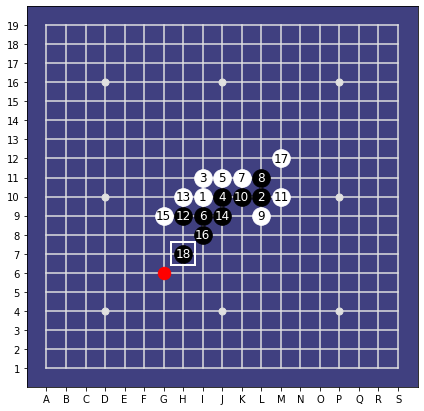

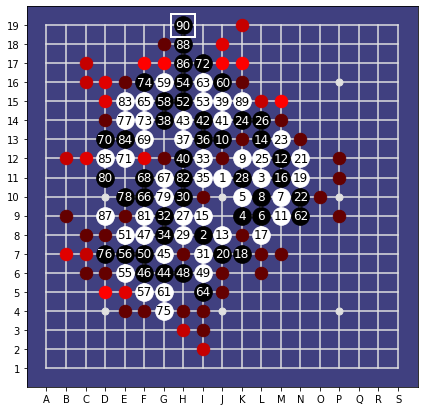

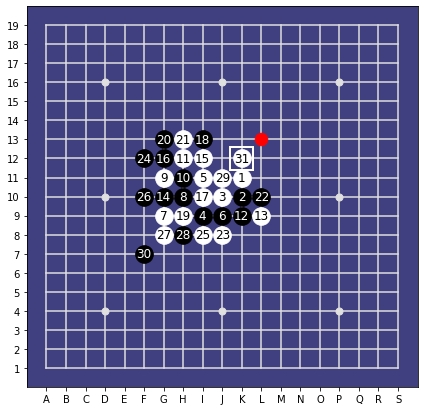

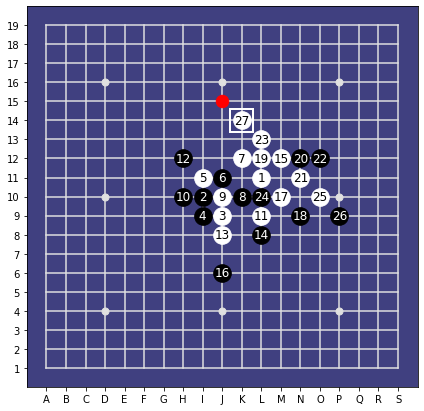

In [10]:
BOARD_SIZE = 19
board = GomokuBoard(BOARD_SIZE)
for game in games[:4]:
    print(f"{game[0]} begins with black")
    stones = [board.Stone(i) for i in game[1]]
    print(stones)
    analyse_board(BOARD_SIZE, stones=stones, adviser_or_array=adviser, disp_width=7)

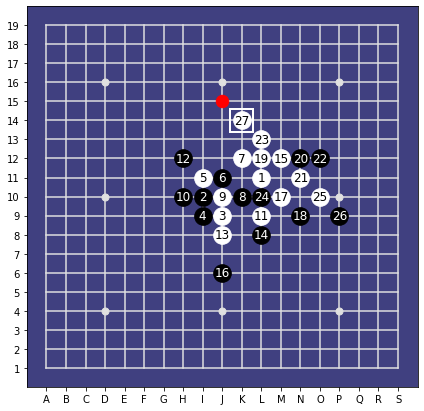

In [12]:
ints = games[3][1]
from aegomoku.utils import analyse_board

analyse_board(19, ints, adviser_or_array=adviser, disp_width=7)

---

## Data Verification
Now we skim through a good chunk of training records to check whether it makes sense to the expected degree.

### Compare with the original policy's estimate
The tree search results in less, but more refined options

632
Next to play: WHITE
Value from WHITE's point of view: -0.04539008784382153
Next to play: WHITE
Value from WHITE's point of view: -0.13031981885433197


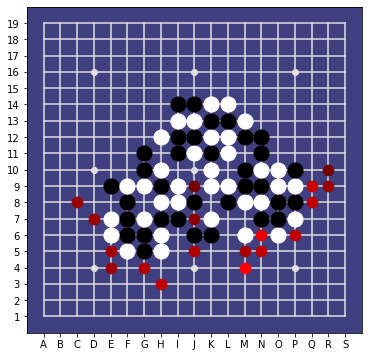

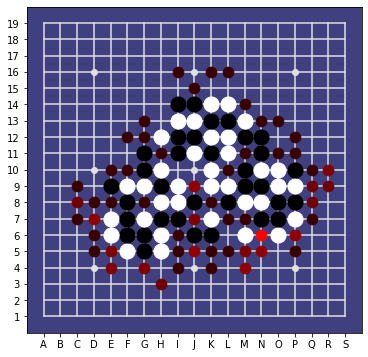

In [32]:
import random
from aegomoku.policies.topological_value import TopologicalValuePolicy

n = random.randint(0, len(examples))
#n = 4688
print(n)
example = examples[n]
analyse_example(example, policy_cutoff=.01, disp_width=6)

from aegomoku.policies.heuristic_value_model import HeuristicValueModel
from aegomoku.policies.heuristic_advice import HeuristicPolicyParams, HeuristicAdviser, HeuristicValueParams

value_params = HeuristicValueParams(board_size=BOARD_SIZE)
value_model = HeuristicValueModel(value_params)
adviser = HeuristicAdviser(HeuristicPolicyParams(board_size=BOARD_SIZE), value_model)

s, _, _ = example
p, v = adviser.evaluate(s)
analyse_example((s, p, v), policy_cutoff=50, disp_width=6)